In [1]:
# Let's import all required libraries
from pathlib import Path
from tqdm import tqdm
import numpy as np
import json
import urllib
import PIL.Image as Image
import cv2
import os
from IPython.display import display
from sklearn.model_selection import train_test_split
import xml.etree.ElementTree as ET

import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc

%matplotlib inline
%config InlineBackend.figure_format='retina'
sns.set(style='whitegrid', palette='muted', font_scale=1.2)
rcParams['figure.figsize'] = 16, 10

np.random.seed(42)

In [5]:
# Set one example data

# Dataset image path
image_path_example = "/home/samir/developer/python/learn/tools/OIDv4_ToolKit/OID/Dataset/train/Human head/0a5f0c98a90eedbc.jpg"

# Dataset image xml path
image_path_xml_example = "/home/samir/developer/python/learn/tools/OIDv4_ToolKit/OID/Dataset/train/Human head/To_PASCAL_XML/0a5f0c98a90eedbc.xml"

# Parsing XML File
tree = ET.parse(image_path_xml_example)
root = tree.getroot()
print("Len {}" .format(len(root)))

#for child in root:
#    print(child.tag, child.attrib)

print("\nFolder")
print(root[0].text + "\n")
print("Filename")
print(root[1].text + "\n")
print("Path")
print(root[2].text + "\n")
print("Source")
print(root[3][0].text + "\n")
print("Size")
print(root[4][0].text)
print(root[4][1].text)
print(root[4][2].text + "\n")
print("Segmented")
print(root[5].text + "\n")
print("Object")
print(root[6][0].text)
print(root[6][1].text)
print(root[6][2].text)
print(root[6][3].text)
print(root[6][4][0].text)
print(root[6][4][1].text)
print(root[6][4][2].text)
print(root[6][4][3].text  + "\n")
print("Object")
print(root[7][0].text)
print(root[7][1].text)
print(root[7][2].text)
print(root[7][3].text)
print(root[7][4][0].text)
print(root[7][4][1].text)
print(root[7][4][2].text)
print(root[7][4][3].text + "\n")
print("Object")
print(root[8][0].text)
print(root[8][1].text)
print(root[8][2].text)
print(root[8][3].text)
print(root[8][4][0].text)
print(root[8][4][1].text)
print(root[8][4][2].text)
print(root[8][4][3].text)

## Need to do len(root) - 4 = number of object present, then process the number of objects.

Len 8

Folder
Human head

Filename
0a5f0c98a90eedbc.jpg

Path
/home/samir/developer/python/learn/tools/OIDv4_ToolKit/OID/Dataset/train/Human head/0a5f0c98a90eedbc.jpg

Source
Unknown

Size
768
1024
3

Segmented
0

Object
head
Unspecified
0
0
386
234
527
431

Object
head
Unspecified
0
0
218
64
381
228

Object


IndexError: child index out of range

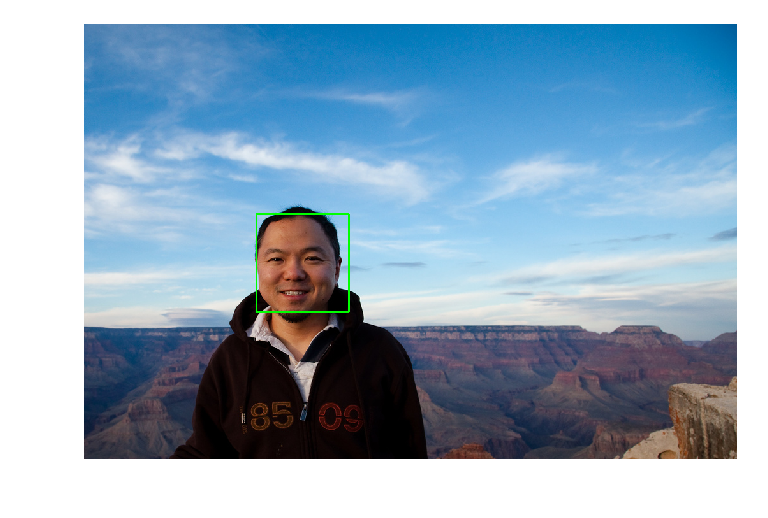

In [3]:
# Explore data

img = cv2.cvtColor(cv2.imread(root[2].text), cv2.COLOR_BGR2RGB)
w = int(root[4][0].text)
h = int(root[4][1].text)

x1, y1 = root[6][4][0].text, root[6][4][1].text
x2, y2 = root[6][4][2].text, root[6][4][3].text

p1 = []
p2 = []
p1.append(int(x1) / w) 
p1.append(int(y1) / h)
p2.append(int(x2) / w)
p2.append(int(y2) / h)

x1, y1 = p1[0] * w, p1[1] * h
x2, y2 = p2[0] * w, p2[1] * h


cv2.rectangle(
  img,
  (int(x1), int(y1)),
  (int(x2), int(y2)),
  color=(0, 255, 0),
  thickness=2
)

# The point coordinates are converted back to pixels and used to draw rectangles over the image. Here's the result:
plt.imshow(img)
plt.axis('off');

In [4]:
# Listing all files in To_PASCAL_XML

from os import listdir
from os.path import isfile, join
pascal_path = "/home/samir/developer/python/learn/tools/OIDv4_ToolKit/OID/Dataset/train/Human head/To_PASCAL_XML"
files = [f for f in listdir(pascal_path) if isfile(join(pascal_path, f))]
print(files)

['8e6e49b4868989cc.xml', '3a4e22d6ebd1ca16.xml', '2c5ebb103dea3c96.xml', '0a0b41864d157dea.xml', 'c63af9656d169358.xml', 'bfded17c32b045ce.xml', '3612305db57167f6.xml', '5ce8cf102efcb363.xml', '65474d23cd15050c.xml', 'eacc175aaa4bc3e3.xml', 'be91711b012a360a.xml', '2da974baafa6c9d6.xml', 'a42f61cadb545c48.xml', '36c2f0668e5381b5.xml', 'ac73c0b2bd4472ea.xml', '4f19c47eed51e395.xml', 'e57d61b677bf9c64.xml', 'c6400d67120c4584.xml', 'ecd83580f7d26c23.xml', '5420a8d3d5c7e2b8.xml', '77a96bacd9c1db1a.xml', '1e79d303eb163ca0.xml', '28946b4675da0868.xml', 'c8d60e2ee46ef2e4.xml', '3a449a8c950c0b82.xml', 'e1e9d4a13d66aba3.xml', '20fac063f91b17d6.xml', 'a568910d16096e23.xml', '4d931b16b502381e.xml', 'a9e5ff487492ab72.xml', '95166534fe95869c.xml', '1f9eedb999d1884e.xml', 'a7ce787d7e51b416.xml', 'f73ac61e63666324.xml', 'a04d4c064dfd0923.xml', 'd57089743161f7ce.xml', '33a930c0a4ce23de.xml', 'c88bab19e2bb6385.xml', 'ec62ab28a2107be6.xml', '05e12947033e229c.xml', '4626fe36fac85953.xml', '40ff83b5409f03

In [5]:
# We have 1 category. Let's split the data into a training and validation set:
train_head, val_head = train_test_split(files, test_size=0.3)
len(train_head), len(val_head)

(10668, 4572)

In [7]:
# Helper functions

def get_xml_root(filepath):
    # Parsing XML File
    tree = ET.parse(os.path.join("/home/samir/developer/python/learn/tools/OIDv4_ToolKit/OID/Dataset/train/Human head/To_PASCAL_XML",filepath))
    root = tree.getroot()
    return root

def create_data(filepath, images_path, labels_path):
    
    for path in tqdm(filepath):
        data = get_xml_root(path)
        # for data in enumerate(tqdm(get_xml_root(path))):
        image_name = f"{data[1].text.split('.')[0]}.jpeg"
        img = Image.open(data[2].text)
        img = img.convert("RGB")
        img.save(str(images_path / image_name), "JPEG")

        label_name = f"{data[1].text.split('.')[0]}.txt"

        with (labels_path / label_name).open(mode="w") as label_file:
            category_idx = 0

            w = int(data[4][0].text)
            h = int(data[4][1].text)

            x1, y1 = data[6][4][0].text, data[6][4][1].text
            x2, y2 = data[6][4][2].text, data[6][4][3].text

            p1 = []
            p2 = []
            p1.append(int(x1) / w) 
            p1.append(int(y1) / h)
            p2.append(int(x2) / w)
            p2.append(int(y2) / h)

            x1, y1 = p1[0], p1[1]
            x2, y2 = p2[0], p2[1]

            bbox_width = x2 - x1
            bbox_height = y2 - y1

            label_file.write(
            f"{category_idx} {x1 + bbox_width / 2} {y1 + bbox_height / 2} {bbox_width} {bbox_height}\n"
            )
        
def create_data_path(dataset_type):
    images_path = Path(f"data/head/images/{dataset_type}")
    images_path.mkdir(parents=True, exist_ok=True)
    
    labels_path = Path(f"data/head/labels/{dataset_type}")
    labels_path.mkdir(parents=True, exist_ok=True)
    return images_path, labels_path

# Creating data folders and return
images_path_train, labels_path_train = create_data_path("train")
images_path_val, labels_path_val = create_data_path("val")

# Filling data
create_data(train_head, images_path_train, labels_path_train)
create_data(val_head, images_path_val, labels_path_val)

100%|██████████| 4572/4572 [05:03<00:00, 15.08it/s]


In [6]:
# Let's see now how the data/head directory is formated

!tree data/head -L 2

data/head
├── images
│   ├── train
│   └── val
└── labels
    ├── train
    └── val

6 directories, 0 files
